In [1]:
import matplotlib.pyplot as plt
import glob
import sys
import pandas as pd
import numpy as np
import sortednp as snp
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from matplotlib import rc
rc('font', family='helvetica')
import seaborn as sns
import time
import itertools
from matplotlib import colors

In [2]:
sns.set_context("paper")

sns.set(font_scale=0.9)
sns.set_style("white")

In [54]:
"Some colorbrewer colors you can use."
p1 = np.array([224/256, 236/256, 244/256, 1])
p2 = np.array([158/256, 160/256, 218/256, 1])
p3 = np.array([136/256, 86/256, 167/256, 1])
g1 = np.array([229/256, 245/256, 249/256, 1])
g2 = np.array([153/256, 216/256, 201/256, 1])
g3 = np.array([44/256, 162/256, 95/256, 1])
o1 = np.array([254/256, 232/256, 200/256, 1])
o2 = np.array([253/256, 187/256, 132/256, 1])
o3 = np.array([227/256, 74/256, 51/256, 1])

In [4]:
def color(cmap):
    cmap = plt.cm.get_cmap(cmap,20)
    cmaplist = [cmap(i) for i in range(cmap.N)]
    #create the new map
    cmap = cmap.from_list('Custom cmap', cmaplist, (cmap.N+1))
    return(cmap)

In [5]:
cmap=color('jet')

In [6]:
"""Define the folders with your input data."""
monomer='/Users/mallu899/Mirror/projects/lacI_CG_master/data/Mono_txt_20/'
dimer='/Users/mallu899/Mirror/projects/lacI_CG_master/data/dimer_RS_txt/'
full_dimer='/Users/mallu899/Mirror/projects/lacI_CG_master/data/fullLength_txt/trajectory_classify_diffusion/'

In [7]:
def import_displacement_csv_as_dataframe(file, nrows):
    """
    Import data from the displacement trajectory analysis.

    Parameter
    ---------
        file : str
            The folder location with the displacement
                      trajectory analysis output files named as
                      '*Displacement_H2A.txt' and '*Displacement_H2B.txt'.
        nrows : int
            The number of rows to import.

    Returns
    -------
        dataframe: pandas DataFrame
            A DataFrame table with columns
            'distance' (Å) ,'position' (Å),'angle' (degrees).
    """
    
    data = np.array(pd.read_csv(file,sep='\s+',header=None,nrows=nrows))
    
    d = {'distance': data[:,1],
        'position': data[:,0],
        'angle': data[:,2]*(180/np.pi)} #angle from radians into degrees
    dataframe=pd.DataFrame(d)
    #print(dataframe)
    return (dataframe)

In [8]:
class TrajectoryToDataFrame():
    """Obtains the analysis of the protein, the output of AnanlysisPy 
    
    This is for either monomeric or dimeric proteins, 
    in form of a pandas Dataframe 
    or a list of Dataframes for DNA-binding domains A and B in a dimer.
    
    Methods
    -------
    dimer(folder,nrows=100000)
        Analysis for dimeric DNA-binding proteins.
        
    monomer(folder,nrows=100000)
        Analysis for monomeric DNA-binding proteins.
        
    """
    
    def dimer(folder,nrows=100000):
        """Import data from the displacement trajectory analysis.

        Parameter
        ---------
            folder (str): The folder location with the displacement
                          trajectory analysis output files named as
                          '*Displacement_H2A.txt' and '*Displacement_H2B.txt'
            nrows (int): number of rows to import

        Returns
        -------
            tuple: .
                   Each element in a list is a DataFrame table with columns
                   'distance','position','angle'.
                   two lists corresponding to the A and B proteins
        """

        filesA = sorted(glob.glob(folder+'*Displacement_H2A.txt'))
        filesB = sorted(glob.glob(folder+'*Displacement_H2B.txt'))
        if len(filesA) != len(filesB):
            raise ImportError('Number of files for A and B must be the same')
        dataframes = []
        files = (filesA,filesB)
        for i in range(2):
            dataframes_ = []
            for file in files[i]:
                dataframes_.append(import_displacement_csv_as_dataframe(file,nrows))
            dataframes.append(dataframes_)

        return tuple(dataframes)
    
    def monomer(folder,nrows=100000):
        """Import data from the displacement trajectory analysis for the monomer.
        
        Parameter
        ---------
            folder (str): The folder location with the displacement
                          trajectory analysis output files named as
                          '*Displacement_*.txt' 
            nrows (int): number of rows to import

        Returns
        -------
            tuple: .
                   Each element in a list is a DataFrame table with columns
                   'distance','position','angle'.
                   two lists corresponding to the A and B proteins
        """

        files = sorted(glob.glob(folder+'*Displacement_*.txt'))

        dataframes = []
        files = files
        for file in files:
            dataframes.append(import_displacement_csv_as_dataframe(file,nrows))

        return tuple(dataframes)

In [9]:
monomerS001=TrajectoryToDataFrame.monomer(monomer+'S01/')
monomerS002=TrajectoryToDataFrame.monomer(monomer+'S02/')
monomerS003=TrajectoryToDataFrame.monomer(monomer+'S03/')
monomerS004=TrajectoryToDataFrame.monomer(monomer+'S04/')

monomerR001=TrajectoryToDataFrame.monomer(monomer+'R01/')
monomerR002=TrajectoryToDataFrame.monomer(monomer+'R02/')
monomerR003=TrajectoryToDataFrame.monomer(monomer+'R03/')
monomerR004=TrajectoryToDataFrame.monomer(monomer+'R04/')

dimerS001=TrajectoryToDataFrame.dimer(dimer+'S/001/')
dimerS002=TrajectoryToDataFrame.dimer(dimer+'S/002/')
dimerS003=TrajectoryToDataFrame.dimer(dimer+'S/003/')
dimerS004=TrajectoryToDataFrame.dimer(dimer+'S/004/')
dimerS005=TrajectoryToDataFrame.dimer(dimer+'S/005/')
dimerS006=TrajectoryToDataFrame.dimer(dimer+'S/006/')

dimerR001=TrajectoryToDataFrame.dimer(dimer+'R/001/')
dimerR002=TrajectoryToDataFrame.dimer(dimer+'R/002/')
dimerR003=TrajectoryToDataFrame.dimer(dimer+'R/003/')
dimerR004=TrajectoryToDataFrame.dimer(dimer+'R/004/')
dimerR005=TrajectoryToDataFrame.dimer(dimer+'R/005/')
dimerR006=TrajectoryToDataFrame.dimer(dimer+'R/006/')

full_dimerR001=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/01/')
full_dimerR002=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/02/')
full_dimerR003=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/03/')
full_dimerR004=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/04/')
full_dimerR005=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/05/')
full_dimerR006=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/06/')

full_dimerS001=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/01/')
full_dimerS002=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/02/')
full_dimerS003=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/03/')
full_dimerS004=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/04/')
full_dimerS005=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/05/')
full_dimerS006=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/06/')

In [10]:
def get_one_bp_step(df,bp_step=0):  
    """Set all the angle ranges to the angle range of one base step.
    
    Parameter
    ---------
    df: pandas DataFrame
        contains the data
    bp_step: int
        which bp step to start with, 0 for the first step.
    """
    l,m = bp_step,bp_step+1
    position_A = pd.concat([y for y in df[0]])
    position_B = pd.concat([y for y in df[1]])
    position_A['DBD']=['A' for x in range(len(position_A))]
    position_B['DBD']=['B' for x in range(len(position_B))]
    positions = position_A.append(position_B)
    positions1 = positions[(l*35<positions['angle']) & (positions['angle']<=m*35)]
    positions1['angle'].apply(lambda x: x - (l*35))
    return(positions1)

In [11]:
all_bp_steps = pd.concat([get_one_bp_step(full_dimerS002, bp_step = x) for x in range(10)])

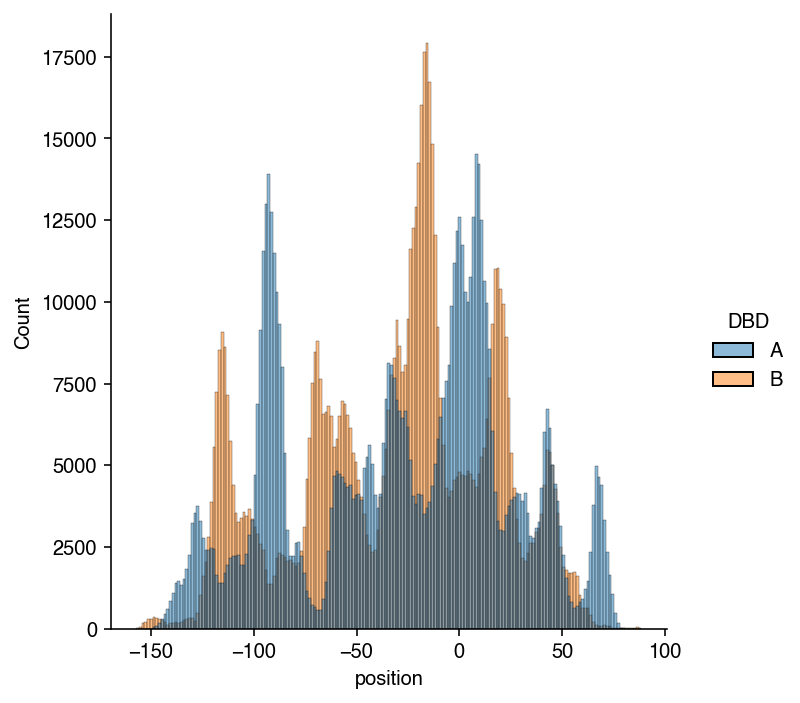

In [12]:
sns.displot(all_bp_steps,x='position',hue='DBD')

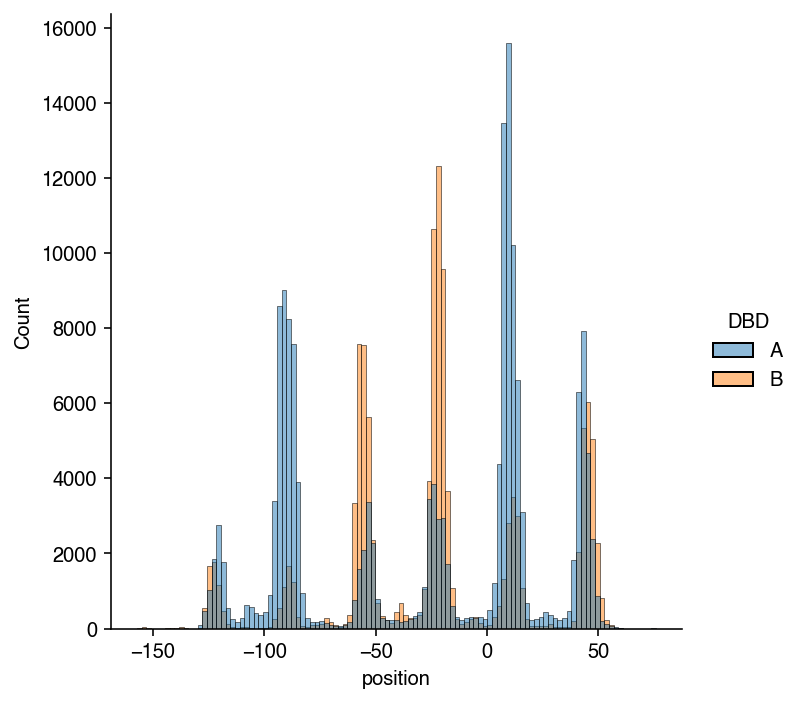

In [13]:
sns.displot(get_one_bp_step(full_dimerS002, bp_step=0),x='position',hue='DBD')

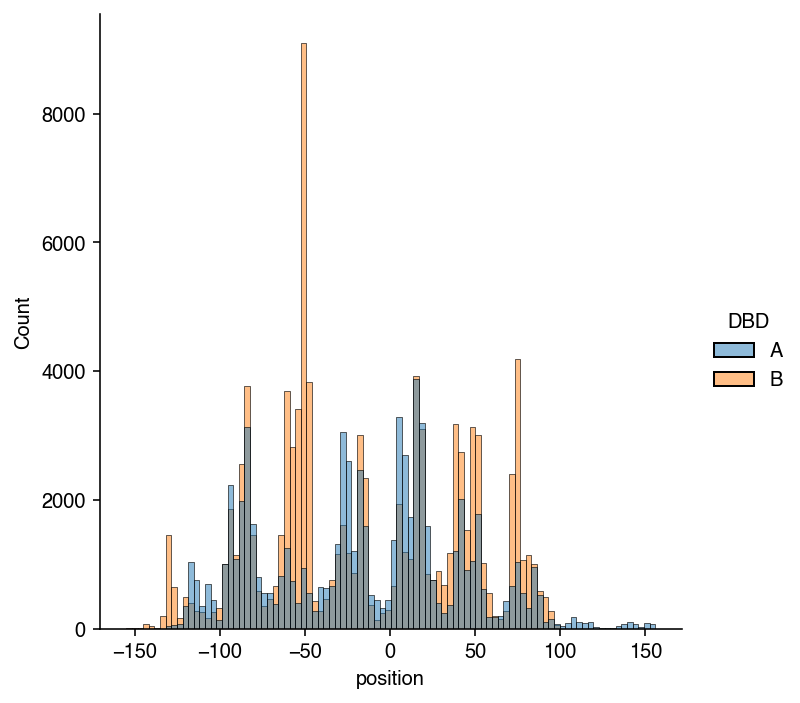

In [14]:
sns.displot(get_one_bp_step(full_dimerR002),x='position',hue='DBD')

In [23]:
#Where things will be stored
trajectory_container = "/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/Version10/Figure2/"

In [12]:
class Grooves():  
    """Plots the position and the angle along the major grooves center in the static, generic B-DNA. 
    
     The groove-functions are a reference frame used to identify sliding.
     These class contains methods for plotting in bp steps and radians.
     
    Methods
    ----------
    f0p-f9p: int 
         return the angle in radians for a position in bp, for better plotting.
    f0y-f9y: int 
         return the position for an angle.
    groove_functions_angle_plotting
        return list(f0p-f9p)
    groove_functions_position_plotting
        return list(f0yp-f9yp)
    
    Usage
    -----
    Grooves.groove_functions()[0](3) returns f0(3)
    
    """

    def f0p(x):
        return ((x*3.3-100)*(9.78636231/180*np.pi))-(1410.46658798/180)*np.pi
    def f0yp(y):
        return (y-(-1410.46658798))/9.78636231
    def f1p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))-(1157.42910297/180)*np.pi
    def f1yp(y):
        return (y-(-1157.42910297))/10.43608208
    def f2p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))-(805.4409265/180)*np.pi
    def f2yp(y):
        return (y-(-805.4409265))/10.43608208
    def f3p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))-(453.45275003/180)*np.pi
    def f3yp(y):
        return (y-(-453.45275003))/10.43608208
    def f4p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))-(101.46457357/180)*np.pi
    def f4yp(y):
        return (y-(-101.46457357))/10.43608208
    def f5p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(250.5236029/180)*np.pi
    def f5yp(y):
        return (y-(250.5236029))/10.43608208
    def f6p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(602.51177936/180)*np.pi
    def f6yp(y):
        return (y-(602.51177936))/10.43608208
    def f7p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(954.49995583/180)*np.pi
    def f7yp(y):
        return (y-(954.49995583))/10.43608208
    def f8p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(1306.48813229/180)*np.pi
    def f8yp(y):
        return (y-(1306.48813229))/10.43608208
    def f9p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(1658.47630876/180)*np.pi
    def f9yp(y):
        return (y-(1658.47630876))/10.43608208
    
    def groove_functions_plotting():
        "Functions that obtain the angle for a value of X-DNA."
        return(Grooves.f0p,Grooves.f1p,Grooves.f2p,Grooves.f3p,Grooves.f4p,Grooves.f5p,Grooves.f6p,Grooves.f7p,Grooves.f8p,Grooves.f9p)
    
    def groove_functions_y_plotting():
        "Functions that obtain the value of X-DNA for one angle."
        return(Grooves.f0yp,Grooves.f1yp,Grooves.f2yp,Grooves.f3yp,Grooves.f4yp,Grooves.f5yp,Grooves.f6yp,Grooves.f7yp,Grooves.f8yp,Grooves.f9yp)

In [107]:
class TrajectoryPlotting:
    """Class for plotting of the the trajectory data obtained from TrajectoryToDataFrame.
    
    Methods
    -------
    plot_distance_position_angle_dimer()
    
    """
    
    def __init__(self,distance_position_angle_df):
        """
        Parameters
        ----------
        distance_position_angle_df : pd.DataFrame
            The dataframe with distance, position and angle.
        """
        
        self.distance_position_angle_df=distance_position_angle_df[0][replica]
        
    def position(self, replica, color, save_file_name=None, dpi = 300):
        """Plot position along the DNA axis.
        
        Parameters
        ----------
        replica : int
            Replica to plot.
        color: str
            Color for the plot. Two clors for monomers.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saved.
        dpi: int
            Default DPI is 300."""
        
        dfA = self[0][replica]
        dfB = self[1][replica]
        
        if color == 'g':
            c1,c2 = g2,g3
        else:
            c1,c2 = o2,o3
        
        fig, ax = plt.subplots(figsize = (4.2,2.),frameon=False,edgecolor='white')
        
        ax.plot(dfA['position']/3.3+50,label='DBD A',color=c1,linewidth=0.8)
        ax.plot(dfB['position']/3.3+50,label='DBD B',color=c2,linewidth=0.8)

        ax.set_yticks(np.arange(0,101,20))
        ax.set_ylabel('Z(bp)',color='k',position=(0,0.33), fontsize = 10)
        ax.set_xlabel('time (ms)', fontsize = 10)
        plt.xticks([0,20000,40000,60000,80000,100000],[0,1,2,3,4,5])

        TrajectoryPlotting.format_and_save(ax, save_file_name, dpi = dpi)
        
    def plot_360_degrees(df,color,skip_frame):
        """Plot the trajectory as line plot without jumps between 0 and 360 degrees.
        
        The function sorts out frames with a large difference in consecutive frames.
        It also checks where the indexes of the shortened dataframe break and plots 
        each of the runs individually to avoid connecting between 360 and 0 °.
        
        Parameters
        ----------
        df: pandas DataFrame
            Contains the data to plot
        color: str
            Color for the plot. Two clors for monomers.
        skip_frame: int
            How many frames to skip for plotting.
        """
        
        target3 = df['angle'].shift(periods=1)
        #skip the fames with large differences in consecutive angles
        dfskip = df[np.sqrt((df['angle']-target3)**2) <= 200 ]  
        oneT = []
        tall = []

        for i in range( len(dfskip)-1):
            if dfskip.index[i] == dfskip.index[i+1]-skip_frame :
                oneT.append(dfskip.iloc[i])
            else:
                tall.append(oneT)
                oneT = []
        tall.append(oneT)

        for i in tall:
            j = pd.DataFrame(i)
            if len(j) >= 1:
                plt.plot(j['position']/3.3+50,j['angle']*(np.pi/180),linewidth = 0.6, \
                         color =color\
                         , alpha=1,linestyle='-')
                
    def translation_vs_rotation(self,skip_frame,replica,color,save_file_name=False,dpi=300):
        """Plot the trajectory as line plot without jumps between 0 and 360 degrees.

            Parameters
            ----------
            skip_frame: int
                How many frames to skip for plotting.
            replica : int
                Replica to plot.
            color: str
                Color for the plot. Two clors for monomers.
            save_file_name: str, optional
                Default is False. Location and file name for figure to be saved.
            dpi : int
                Default DPI is 300.
        """
        
        if color == 'g':
            c1,c2 = g2,g3
        else:
            c1,c2 = o2,o3
            
        fig, ax = plt.subplots(figsize = (3.,2.1)) 
        dfA = self[0][replica]
        dfB = self[1][replica]

        targetA = dfA.loc[::skip_frame] #do only analyse every skip_frame frame
        targetB = dfB.loc[::skip_frame] 

        TrajectoryPlotting.plot_360_degrees(targetA,c1,skip_frame)
        TrajectoryPlotting.plot_360_degrees(targetB,c2,skip_frame)

        axes = plt.gca()
        axes.set_ylim(0,2*np.pi)
        axes.set_xlim(0,100)
        plt.ylabel('$\phi$ (rad)', fontsize = 12,color='k')
        plt.xlabel('Z (bp)', fontsize = 12,color='k')     

        TrajectoryPlotting.format_and_save(ax, save_file_name, dpi=dpi)

            
    def translation_vs_rotation_and_distance_dimer(self, replica, color, save_file_name=None, dpi = 300):
        """Plot distance, position and angle relative to the DNA axis.
        
        Parameters
        ----------
        replica : int
            Replica to plot.
        color: str
            Color for the plot. Two clors for monomers.
        save_file_name: str, optional
            Default is False. Location and file name for figure to be saved.
        dpi : int
            Default DPI is 300."""
        
        dfA = self[0][replica]
        dfB = self[1][replica]
        
        if color == 'g':
            c1,c2 = g2,g3
        else:
            c1,c2 = o2,o3
            
        fig, ax = plt.subplots(figsize = (2.5,2.),frameon=False,edgecolor='white')
        ax.plot(dfA['position']/3.3+50,label='DBD A',color=c1,linewidth=0.8)
        ax.plot(dfB['position']/3.3+50,label='DBD B',color=c2,linewidth=0.8)

        ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.plot(dfA['distance'],'-',label='$d$ (DBD A)',color=c1,linewidth=0.8)
        ax2.plot(dfB['distance'],'-',label='$d$ (DBD B)',color=c2,linewidth=0.8)

        frames = np.arange(len(dfA['angle']))
        plt.legend([],[], frameon=False)

        ax.set_ylim((0,190))
        ax2.set_ylim((-100,80))

        ax.set_yticks(np.arange(0,101,20))
        ax2.set_yticks(np.arange(0,61,20))

        ax.set_ylabel('Z(bp)',color='k',position=(0,0.33), fontsize = 10)
        ax2.set_ylabel('$d$ (Å)',color='k',position=(0,0.7), fontsize = 10)
        ax.set_xlabel('time (ms)', fontsize = 10)
        plt.xticks([0,20000,40000,60000,80000,100000],[0,1,2,3,4,5])
        
        TrajectoryPlotting.format_and_save(ax, save_file_name, dpi=dpi)

            
    def distances_RS(self, R_data, replica, skip_frames, save_file_name=None, dpi = 300):
        """Plot the distances of binding domains from the DNA axis along the trajectory. 
        
        Parameters
        ----------
        R-data: pandas DataFrame 
            contain the data for the other conformation.
        replica : int
            Replica to plot.
        skip_frame: int
            How many frames to skip for plotting.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saved.
        dpi : int
            Default DPI is 300."""
         
        dfAS = self[0][replica]
        dfBS = self[1][replica]
        dfAR = R_data[0][replica]
        dfBR = R_data[1][replica]
        
        
        fig, ax = plt.subplots(figsize = (1.8,1.8))
        plt.scatter(dfAS['distance'][::skip_frames],dfBS['distance'][::skip_frames],color=o2,s=0.002)
        plt.scatter(dfAR['distance'][::skip_frames],dfBR['distance'][::skip_frames],color='darkcyan',s=0.002)

        axes = plt.gca()
        axes.set_xlim(0,51)
        axes.set_ylim(0,51)
        plt.xticks([0,10,20,30,40,50])
        plt.yticks([0,10,20,30,40,50])
        axes.set_aspect('equal')


        plt.ylabel('d (Å) DBD A', fontsize = 9,color='k')
        plt.xlabel('d (Å) DBD B', fontsize = 9,color='k')

        TrajectoryPlotting.format_and_save(ax, save_file_name, dpi=dpi)

          
    def position_angle_dimer_hex(self, skip_frames, save_file_name=None, dpi= 300, gridsize=160):
        """Plot position and angle for all replicas using hex plots. 
        
        Dependencies
        ------------
        Grooves are indicated based on Grooves.groove_functions_angle_plotting. 
        
        Parameters
        ----------
        skip_frame: int
            How many frames to skip for plotting.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saved.
        dpi: int
            Default DPI is 300.
        gridsize = int
            Size of the grid for hexbin. Default is 160."""

        dfA = pd.concat([self[0][replica] for replica in range(len(self[0]))])

        fig, ax = plt.subplots(figsize = (3.1,2.1))

        plt.hexbin(dfA['position'][::skip_frames]/3.3+50, dfA['angle'][::skip_frames]*(np.pi/180), \
                   gridsize=gridsize, cmap=cmap, extent=[-20, 100, 0, 2*np.pi])

        Ztt = np.arange(-20,100,10)
        for f in range(len(Grooves.groove_functions_plotting())):
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)-1.5,':',alpha=0.7,color='white')
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)+2.5,':',alpha=0.7,color='white')

        plt.colorbar()
        axes = plt.gca()
        axes.set_ylim(0,2*np.pi)
        axes.set_xlim(-10,90)
        plt.ylabel('$\phi$ (rad)', fontsize = 12,color='k')
        plt.xlabel('Z (bp)', fontsize = 12,color='k')
        TrajectoryPlotting.format_and_save(ax, save_file_name, dpi=dpi)

    
    def position_distance_dimer_hex(self, skip_frames, save_file_name=None, dpi=300, gridsize=160):
        """Plot the position and the distance for all replicas. 
        
        Dependencies
        ------------
        The grooves are going to be indicated based on the Grooves.groove_functions_angle_plotting
        module. 
        
        Parameters
        ----------
        skip_frame: int
            How many frames to skip for plotting.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saved.
        dpi = int
            Default DPI is 300.
        gridsize = int
             Size of the grid for hexbin. Default is 160.
        """

        dfA = pd.concat([self[0][replica] for replica in range(len(self[0]))])
        dfB = pd.concat([self[1][replica] for replica in range(len(self[0]))])
        fig, ax = plt.subplots(figsize = (3.1,2.1))

        plt.hexbin(dfA['position'][::skip_frames]/3.3+50, dfA['distance'][::skip_frames], \
                   gridsize=gridsize, cmap=cmap) 

        plt.colorbar()
        axes = plt.gca()
        axes.set_ylim(10,25)

        plt.ylabel('d (Å)', fontsize = 12,color='k')
        plt.xlabel('Z (bp)', fontsize = 12,color='k')

        TrajectoryPlotting.format_and_save(ax, save_file_name, dpi=dpi)

            
    def position_angle_monomer_hex(data, skip_frames, save_file_name=None, dpi=300, gridsize=160):
        """Plot the position and the angle of the trajectory for all replicas using seaborns kde plot. 
        
        Dependencies
        ------------
        The grooves are going to be indicated based on the Grooves.groove_functions_angle_plotting
        module. 
        
        Parameters
        ----------
        skip_frame: int
            How many frames to skip for plotting.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saved.
        dpi = int
            Default DPI is 300.
        gridsize = int
             Size of the grid for hexbin. Default is 160.
        """

        dfA = pd.concat([data[replica] for replica in range(len(data))])

        fig, ax = plt.subplots(figsize = (3.,2.1))

        plt.hexbin(dfA['position'][::skip_frames]/3.3+50, dfA['angle'][::skip_frames]*(np.pi/180), \
                   gridsize=gridsize, cmap=cmap, extent=[-20, 100, 0, 2*np.pi])

        Ztt = np.arange(-20,100,10)
        for f in range(len(Grooves.groove_functions_plotting())):
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)-1.5,':',alpha=0.7,color='white')
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)+2.5,':',alpha=0.7,color='white')

        plt.colorbar()
        axes = plt.gca()
        axes.set_ylim(0,2*np.pi)
        axes.set_xlim(-10,90)
        plt.ylabel('$\phi$ (rad)', fontsize = 12,color='k')
        plt.xlabel('Z (bp)', fontsize = 12,color='k')

        TrajectoryPlotting.format_and_save(ax, save_file_name, dpi=dpi)
        
    def format_and_save(ax, save_file_name , dpi = 300):    
        ax.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=True,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=True,
                    labeltop = False,
                    right=False, left=True, labelleft=True,labelsize='small',
                    width = 0.5,
                    length = 3, color='k',direction ='in')
        
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(12)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(12)
        plt.tight_layout()
        if save_file_name:
            plt.savefig(save_file_name,dpi=dpi,transparent=True)

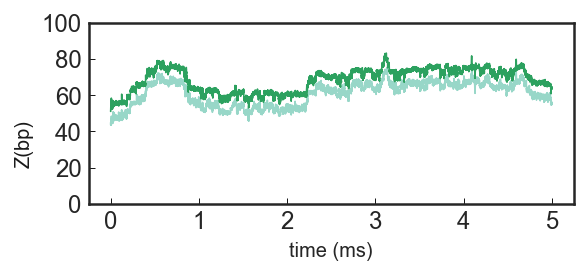

In [61]:
TrajectoryPlotting.position(full_dimerR001,2,'g')

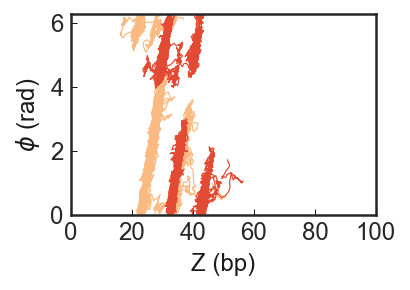

In [68]:
test=TrajectoryPlotting.translation_vs_rotation(full_dimerS001,10,0,'o',save_file_name=trajectory_container+'line_S001_1')

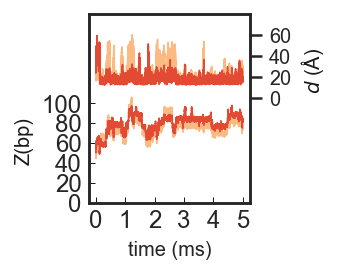

In [76]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS003,3,'o',save_file_name=trajectory_container+'S_003_3')


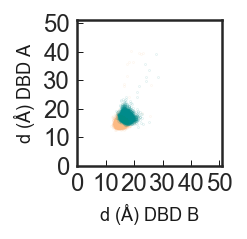

In [82]:
TrajectoryPlotting.distances_RS(full_dimerS001,full_dimerR001,2,20)

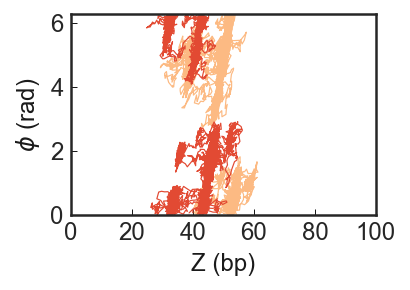

In [70]:
TrajectoryPlotting.translation_vs_rotation(full_dimerS002,10,0,'o')

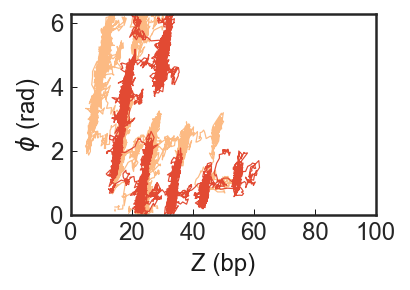

In [71]:
TrajectoryPlotting.translation_vs_rotation(full_dimerS002,10,1,'o',save_file_name=trajectory_container+'line_S002_1')

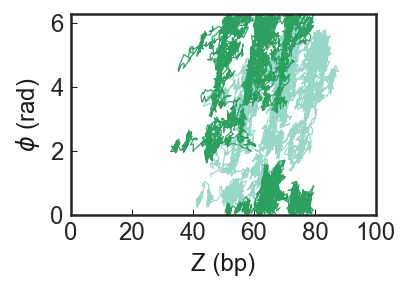

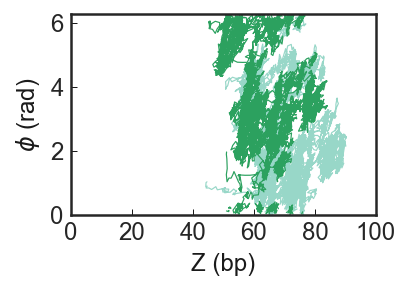

In [72]:
TrajectoryPlotting.translation_vs_rotation(full_dimerR002,10,1,'g')
TrajectoryPlotting.translation_vs_rotation(full_dimerR002,10,0,'g',save_file_name=trajectory_container+'line_R002_1')

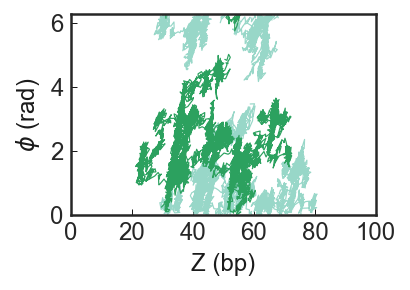

In [73]:
TrajectoryPlotting.translation_vs_rotation(full_dimerR001,10,0,'g',save_file_name=trajectory_container+'line_R001_1')

In [110]:
trajectory_container

'/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/SI/trajectories/'

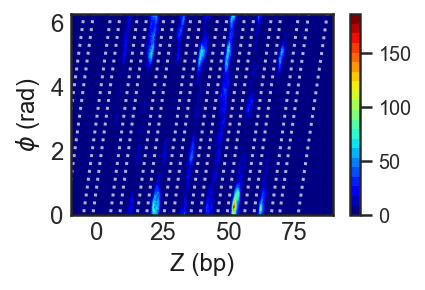

In [112]:
trajectory_container = \
"/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure2/"
cmap=color('jet')
#TrajectoryPlotting.position_angle_dimer_hex(full_dimerS001,1,save_file_name=trajectory_container+'hex_S_001')
TrajectoryPlotting.position_angle_dimer_hex(full_dimerS002,1,save_file_name=trajectory_container+'hex_S_002', gridsize=500)
#TrajectoryPlotting.position_angle_dimer_hex(full_dimerS003,1,save_file_name=trajectory_container+'hex_S_003', gridsize=300)
#TrajectoryPlotting.position_angle_dimer_hex(full_dimerS004,1,save_file_name=trajectory_container+'hex_S_004')
#TrajectoryPlotting.position_angle_dimer_hex(full_dimerS005,1)
#TrajectoryPlotting.position_angle_dimer_hex(full_dimerS006,1)

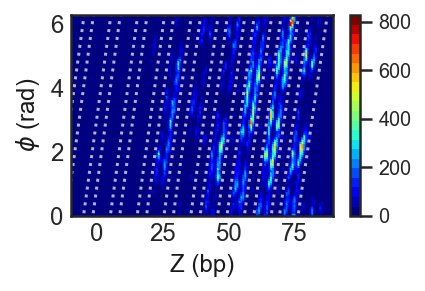

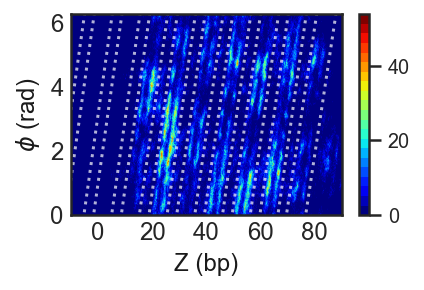

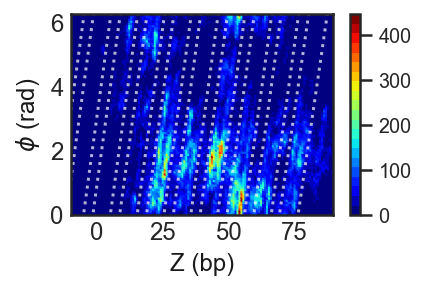

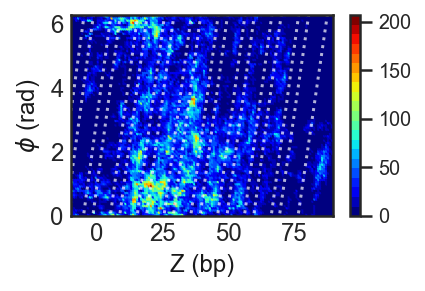

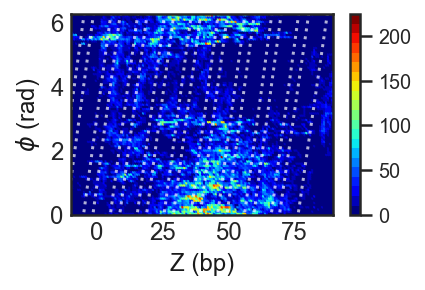

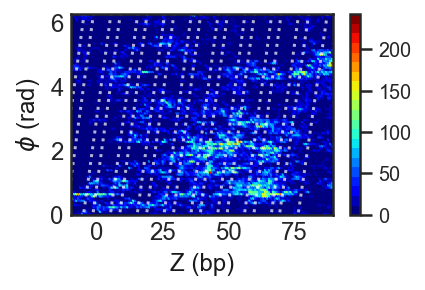

In [113]:
cmap=color('jet')
TrajectoryPlotting.position_angle_dimer_hex(full_dimerR001,1,save_file_name=trajectory_container+'hex_R_001')
TrajectoryPlotting.position_angle_dimer_hex(full_dimerR002,1,save_file_name=trajectory_container+'hex_R_002', gridsize=500)
TrajectoryPlotting.position_angle_dimer_hex(full_dimerR003,1,save_file_name=trajectory_container+'hex_R_003')
TrajectoryPlotting.position_angle_dimer_hex(full_dimerR004,1,save_file_name=trajectory_container+'hex_R_004')
TrajectoryPlotting.position_angle_dimer_hex(full_dimerR005,1)
TrajectoryPlotting.position_angle_dimer_hex(full_dimerR006,1)

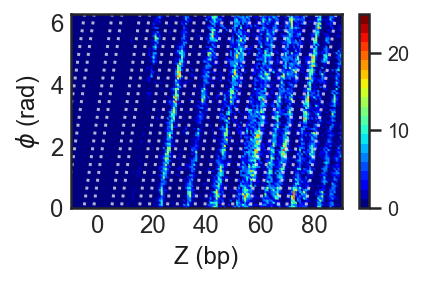

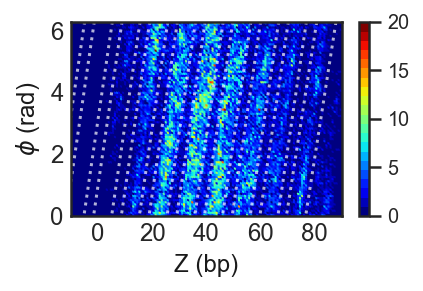

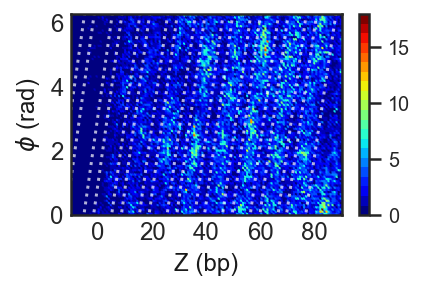

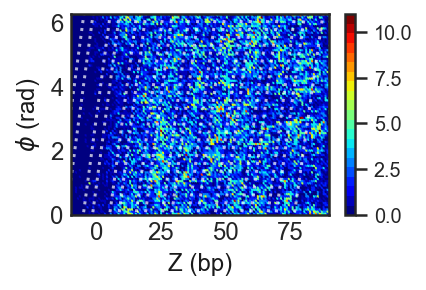

In [25]:
cmap=color('jet')
TrajectoryPlotting.position_angle_dimer_hex(dimerR001,10,save_file_name=trajectory_container+'hex_dimer_R_001')
TrajectoryPlotting.position_angle_dimer_hex(dimerR002,10,save_file_name=trajectory_container+'hex_dimer_R_002')
TrajectoryPlotting.position_angle_dimer_hex(dimerR003,10,save_file_name=trajectory_container+'hex_dimer_R_003')
TrajectoryPlotting.position_angle_dimer_hex(dimerR004,10,save_file_name=trajectory_container+'hex_dimer_R_004')

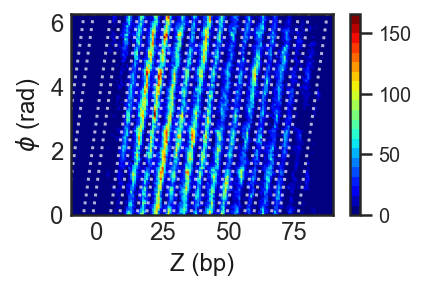

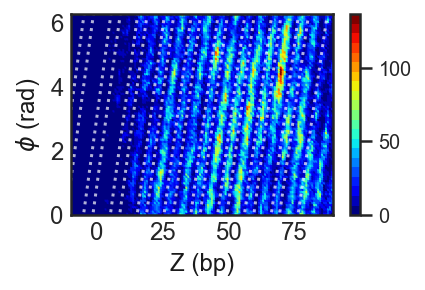

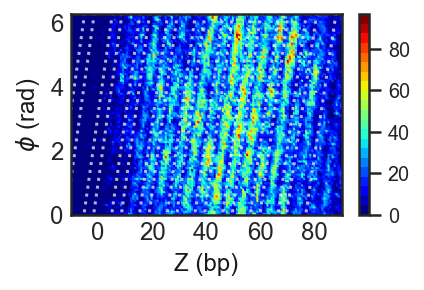

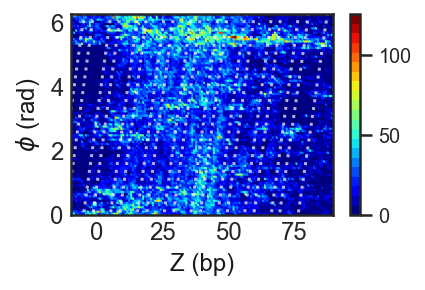

In [26]:
cmap=color('jet')
TrajectoryPlotting.position_angle_dimer_hex(dimerS001,1,save_file_name=trajectory_container+'hex_dimer_S_001')
TrajectoryPlotting.position_angle_dimer_hex(dimerS002,1,save_file_name=trajectory_container+'hex_dimer_S_002')
TrajectoryPlotting.position_angle_dimer_hex(dimerS003,1,save_file_name=trajectory_container+'hex_dimer_S_003')
TrajectoryPlotting.position_angle_dimer_hex(dimerS004,1,save_file_name=trajectory_container+'hex_dimer_S_004')

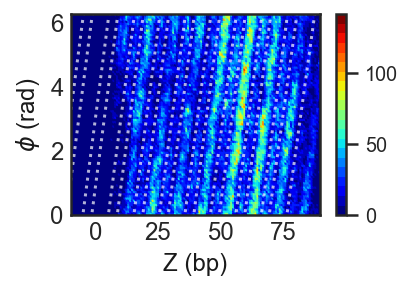

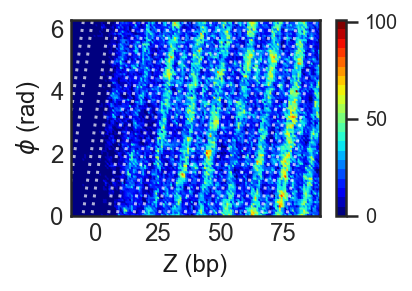

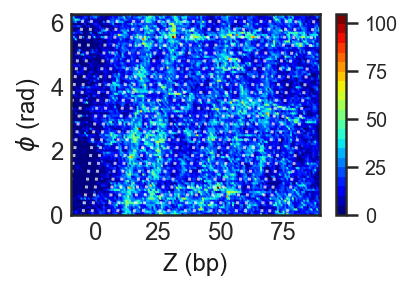

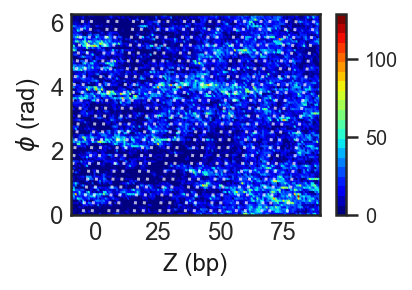

In [102]:
cmap=color('jet')

TrajectoryPlotting.position_angle_monomer_hex(monomerS001,1,save_file_name=trajectory_container+'hex_mono_S_001')
TrajectoryPlotting.position_angle_monomer_hex(monomerS002,1,save_file_name=trajectory_container+'hex_mono_S_002')
TrajectoryPlotting.position_angle_monomer_hex(monomerS003,1,save_file_name=trajectory_container+'hex_mono_S_003')
TrajectoryPlotting.position_angle_monomer_hex(monomerS004,1,save_file_name=trajectory_container+'hex_mono_S_004')

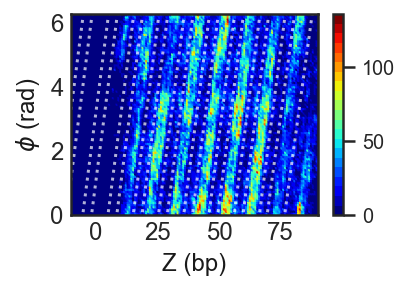

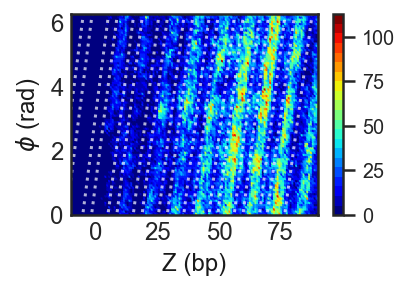

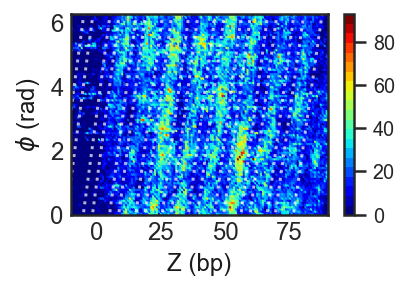

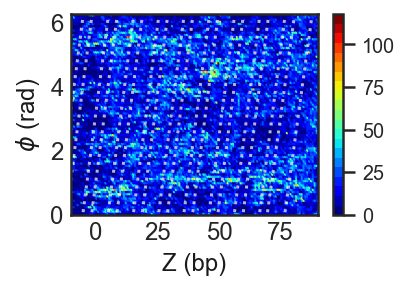

In [28]:
cmap=color('jet')

TrajectoryPlotting.position_angle_monomer_hex(monomerR001,1,save_file_name=trajectory_container+'hex_mono_R_001')
TrajectoryPlotting.position_angle_monomer_hex(monomerR002,1,save_file_name=trajectory_container+'hex_mono_R_002')
TrajectoryPlotting.position_angle_monomer_hex(monomerR003,1,save_file_name=trajectory_container+'hex_mono_R_003')
TrajectoryPlotting.position_angle_monomer_hex(monomerR004,1,save_file_name=trajectory_container+'hex_mono_R_004')

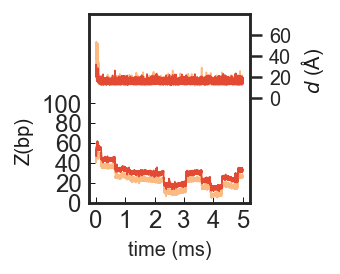

In [86]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS002,1,'o')#,save_file_name="/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/Version9/Figure4_plots/trajectory.png")

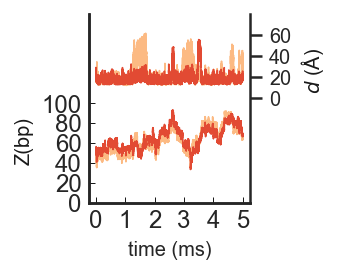

In [43]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS003,0,'o')

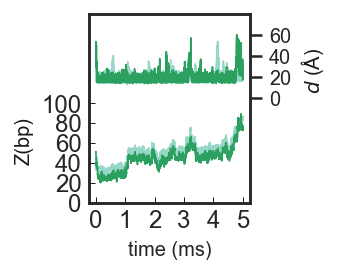

In [87]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR003,0,'g')

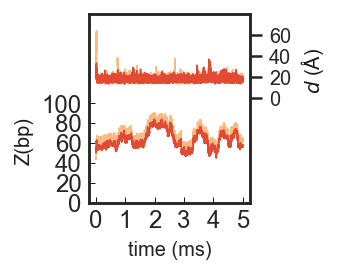

In [88]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR002,0,'darkcyan','g')

In [46]:
trajectory_container='/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/SI/trajectories/'

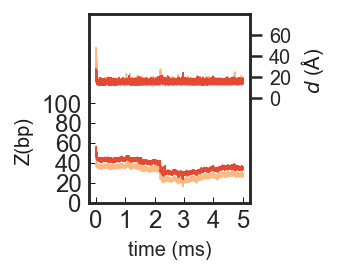

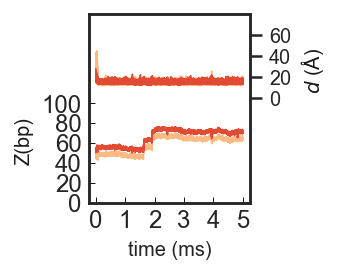

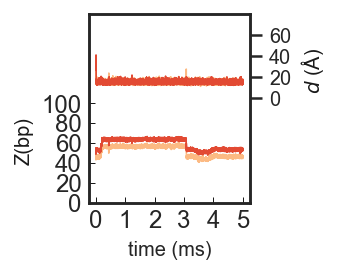

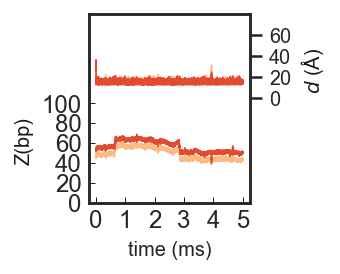

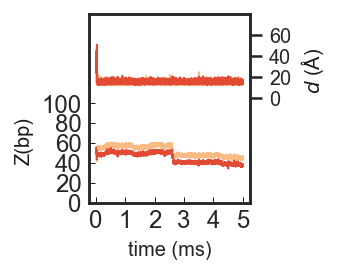

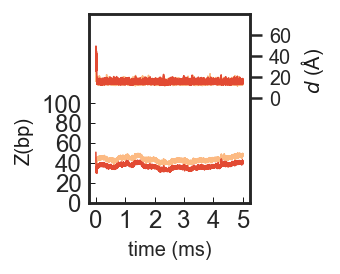

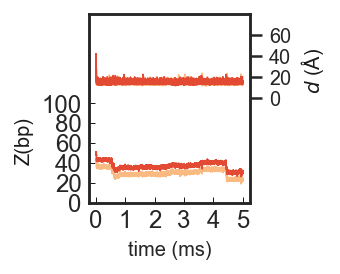

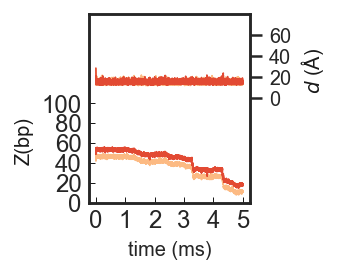

In [89]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS001,0,'o',save_file_name=trajectory_container+'S_001_1')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS001,1,'o')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS001,2,'o',save_file_name=trajectory_container+'S_001_2')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS001,3,'o')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS001,4,'o')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS001,5,'o')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS001,6,'o',save_file_name=trajectory_container+'S_001_3')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS001,7,'o')

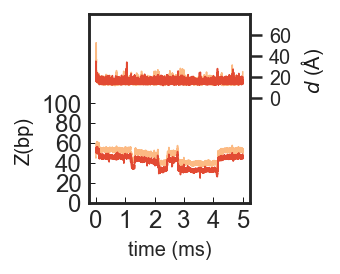

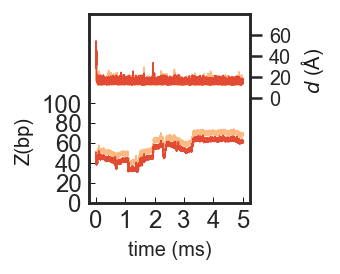

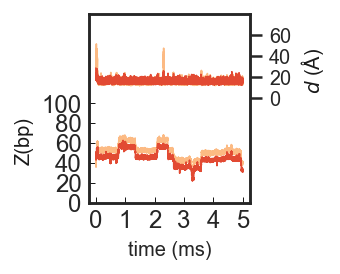

In [90]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS002,0,'o',save_file_name=trajectory_container+'S_002_1')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS002,2,'o',save_file_name=trajectory_container+'S_002_3')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS002,6,'o',save_file_name=trajectory_container+'S_002_7')


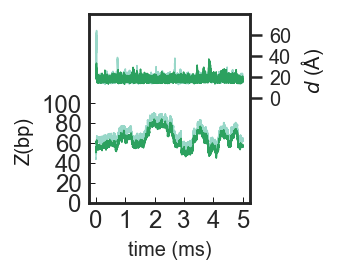

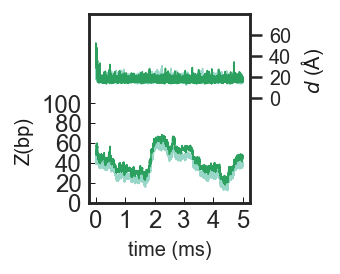

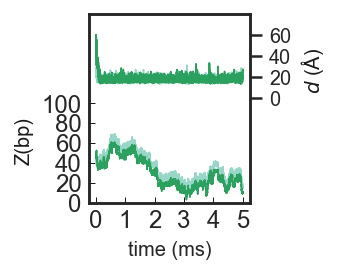

In [91]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR002,0,'g',save_file_name=trajectory_container+'R_002_1')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR002,2,'g',save_file_name=trajectory_container+'R_002_3')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR002,6,'g',save_file_name=trajectory_container+'R_002_7')

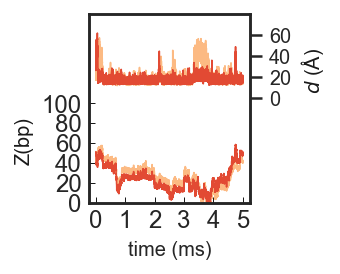

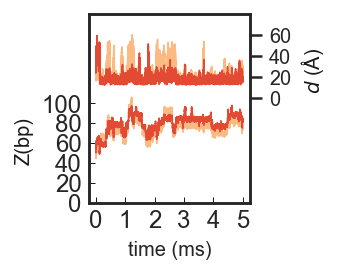

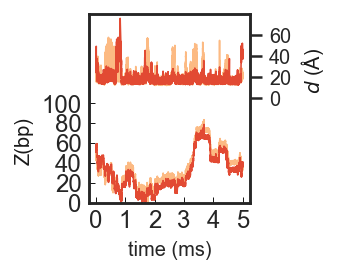

In [92]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS003,2,'o',save_file_name=trajectory_container+'S_003_2')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS003,3,'o',save_file_name=trajectory_container+'S_003_3')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerS003,4,'o',save_file_name=trajectory_container+'S_003_4')

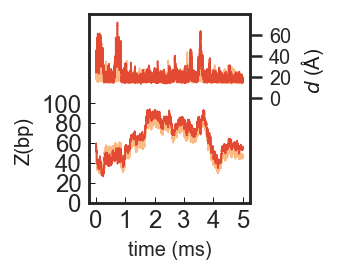

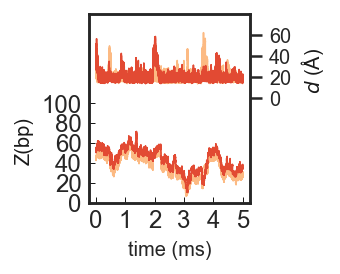

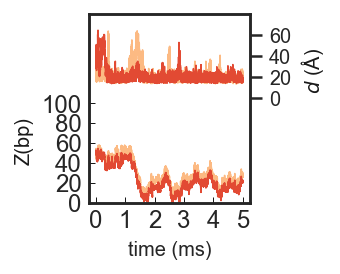

In [93]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR003,2,'o',save_file_name=trajectory_container+'R_003_2')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR003,3,'o',save_file_name=trajectory_container+'R_003_3')
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR003,4,'o',save_file_name=trajectory_container+'R_003_4')

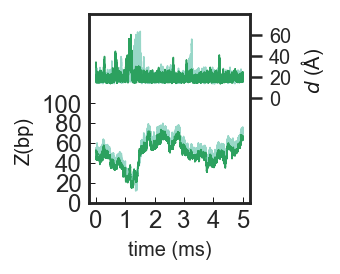

In [96]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR003,6,'g')

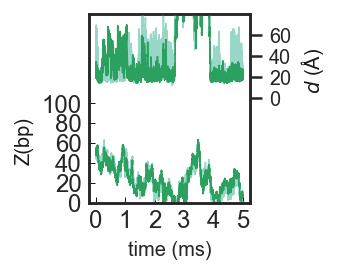

In [97]:
TrajectoryPlotting.translation_vs_rotation_and_distance_dimer(full_dimerR004,1,'g')